<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>

<h1 align="center"><font size="5">Final Project: Classification with Python</font></h1>


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
    <li><a href="https://#Section_1">Instructions</a></li>
    <li><a href="https://#Section_2">About the Data</a></li>
    <li><a href="https://#Section_3">Importing Data </a></li>
    <li><a href="https://#Section_4">Data Preprocessing</a> </li>
    <li><a href="https://#Section_5">One Hot Encoding </a></li>
    <li><a href="https://#Section_6">Train and Test Data Split </a></li>
    <li><a href="https://#Section_7">Train Logistic Regression, KNN, Decision Tree, SVM, and Linear Regression models and return their appropriate accuracy scores</a></li>
</a></li>
</div>
<p>Estimated Time Needed: <strong>180 min</strong></p>
</div>

<hr>


# Instructions


In this notebook, you will  practice all the classification algorithms that we have learned in this course.


Below, is where we are going to use the classification algorithms to create a model based on our training data and evaluate our testing data using evaluation metrics learned in the course.

We will use some of the algorithms taught in the course, specifically:

1. Linear Regression
2. KNN
3. Decision Trees
4. Logistic Regression
5. SVM

We will evaluate our models using:

1.  Accuracy Score
2.  Jaccard Index
3.  F1-Score
4.  LogLoss
5.  Mean Absolute Error
6.  Mean Squared Error
7.  R2-Score

Finally, you will use your models to generate the report at the end

# About The Dataset

The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset to be used has extra columns like 'RainToday' and our target is 'RainTomorrow', which was gathered from the Rattle at [https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData](https://bitbucket.org/kayontoga/rattle/src/master/data/weatherAUS.RData?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


This dataset contains observations of weather metrics for each day from 2008 to 2017. The **weatherAUS.csv** dataset includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| ------------- | ----------------------------------------------------- | --------------- | ------ |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged of 10 minutes prior to 9am    | Compass Points  | object |
| WindDir3pm    | Wind direction averaged of 10 minutes prior to 3pm    | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged of 10 minutes prior to 9am        | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged of 10 minutes prior to 3pm        | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was rain today                               | Yes/No          | object |
| RainTomorrow  | If there is rain tomorrow                             | Yes/No          | float  |

Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)


## **Import the required libraries**

In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import preprocessing
from sklearn.metrics import (
    jaccard_score, f1_score, log_loss, confusion_matrix,
    accuracy_score, mean_absolute_error, mean_squared_error, r2_score
)
import warnings
warnings.filterwarnings('ignore')


### Importing the Dataset

In [5]:
pip install pandas numpy scikit-learn


In [9]:
import pandas as pd

# Define the URL
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv'

# Download and load the CSV file into a DataFrame
df = pd.read_csv(path)

# Display the first few rows of the DataFrame
print(df.head())


       Date  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine WindGustDir  \
0  2/1/2008     19.5     22.4      15.6          6.2       0.0           W   
1  2/2/2008     19.5     25.6       6.0          3.4       2.7           W   
2  2/3/2008     21.6     24.5       6.6          2.4       0.1           W   
3  2/4/2008     20.2     22.8      18.8          2.2       0.0           W   
4  2/5/2008     19.7     25.7      77.4          4.8       0.0           W   

   WindGustSpeed WindDir9am WindDir3pm  ...  Humidity9am  Humidity3pm  \
0             41          S        SSW  ...           92           84   
1             41          W          E  ...           83           73   
2             41        ESE        ESE  ...           88           86   
3             41        NNE          E  ...           83           90   
4             41        NNE          W  ...           88           74   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1017

> Note: This version of the lab is designed for JupyterLite, which necessitates downloading the dataset to the interface. However, when working with the downloaded version of this notebook on your local machines (Jupyter Anaconda), you can simply **skip the steps above of "Importing the Dataset"** and use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [10]:
#filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillUp/labs/ML-FinalAssignment/Weather_Data.csv"
#df = pd.read_csv(filepath)

In [11]:
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2/1/2008,19.5,22.4,15.6,6.2,0.0,W,41,S,SSW,...,92,84,1017.6,1017.4,8,8,20.7,20.9,Yes,Yes
1,2/2/2008,19.5,25.6,6.0,3.4,2.7,W,41,W,E,...,83,73,1017.9,1016.4,7,7,22.4,24.8,Yes,Yes
2,2/3/2008,21.6,24.5,6.6,2.4,0.1,W,41,ESE,ESE,...,88,86,1016.7,1015.6,7,8,23.5,23.0,Yes,Yes
3,2/4/2008,20.2,22.8,18.8,2.2,0.0,W,41,NNE,E,...,83,90,1014.2,1011.8,8,8,21.4,20.9,Yes,Yes
4,2/5/2008,19.7,25.7,77.4,4.8,0.0,W,41,NNE,W,...,88,74,1008.3,1004.8,8,8,22.5,25.5,Yes,Yes


### Data Preprocessing

#### One Hot Encoding

First, we need to perform one hot encoding to convert categorical variables to binary variables.

In [12]:
df_sydney_processed = pd.get_dummies(data=df, columns=['RainToday', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

Next, we replace the values of the 'RainTomorrow' column changing them from a categorical column to a binary column. We do not use the `get_dummies` method because we would end up with two columns for 'RainTomorrow' and we do not want, since 'RainTomorrow' is our target.

In [13]:
df_sydney_processed.replace(['No', 'Yes'], [0,1], inplace=True)

### Training Data and Test Data

Now, we set our 'features' or x values and our Y or target variable

In [14]:
df_sydney_processed.drop('Date',axis=1,inplace=True)

In [15]:
df_sydney_processed = df_sydney_processed.astype(float)

In [16]:
features = df_sydney_processed.drop(columns='RainTomorrow', axis=1)
Y = df_sydney_processed['RainTomorrow']

### Linear Regression

#### Q1) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `10`.


In [19]:
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=10)

In [20]:
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2616, 66)
x_test shape: (655, 66)
y_train shape: (2616,)
y_test shape: (655,)


#### Q2) Create and train a Linear Regression model called LinearReg using the training data (`x_train`, `y_train`).


In [21]:
LinearReg = LinearRegression()
LinearReg.fit(x_train, y_train)

LinearRegression()

In [22]:
print("Coefficients:", LinearReg.coef_)
print("Intercept:", LinearReg.intercept_)

Coefficients: [-0.02369173  0.01300554  0.00072981  0.00649077 -0.03516427  0.00423762
  0.0018292   0.00078986  0.00095609  0.00856061  0.00769793 -0.00924424
 -0.00887454  0.01004774  0.01446555 -0.00348065 -0.05402493  0.05402493
  0.05039419 -0.07898527  0.06640003 -0.0721012  -0.05945626 -0.08239011
 -0.0789619   0.06418738 -0.00838878  0.11105128  0.01414852  0.03851666
  0.03625722 -0.02133122  0.00395909  0.01670037  0.04350405  0.05317842
 -0.00692976 -0.01911823 -0.01461142 -0.00594829 -0.07546046  0.04176858
 -0.00758587 -0.00980346 -0.01874997  0.00302978  0.01914623 -0.0012425
 -0.01756641  0.01638932 -0.09330032 -0.08339081 -0.01838672 -0.05191842
 -0.04092463  0.03423083  0.06883841  0.01862747  0.06892422  0.00033817
 -0.04820507  0.0755034   0.03967488  0.02636872 -0.02236214  0.02598199]
Intercept: 1.2077394797185916


#### Q3) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [23]:
#Enter Your Code and Execute
predictions = LinearReg.predict(x_test)

In [24]:
print("Predictions:", predictions)

Predictions: [ 1.31840712e-01  2.76185900e-01  9.78188185e-01  2.87456100e-01
  1.32413708e-01  4.60464181e-01  3.56787457e-01  8.56406853e-01
  6.75011913e-01  3.82473927e-02  4.77419539e-03  2.81216244e-01
  3.39082151e-01  7.80932817e-02  6.25941374e-02  5.64436895e-01
 -6.15522275e-02  5.24162822e-01  1.53690035e-01  3.59699285e-01
  6.05340925e-02  9.03559778e-01  4.67319777e-01  2.03371127e-01
 -7.10231590e-02  3.83879525e-01  5.36083689e-01 -2.28933693e-02
  6.40131507e-01 -9.56732521e-02  3.78086413e-01  1.20264352e-01
 -1.81459863e-02  5.53851712e-02  5.63533571e-01  1.06298389e+00
 -6.75137845e-03  5.14393583e-01 -8.83888189e-02  6.91943913e-02
  2.44741034e-02  8.71740067e-01  2.44667654e-01  3.94725191e-01
  2.67561501e-01  4.46793579e-01 -4.75684922e-02  1.89430640e-01
  7.76606954e-01  1.57760377e-01  3.94719448e-03 -5.19683322e-02
  2.07339163e-01 -2.07888133e-01 -7.61137847e-02  2.49651865e-01
  2.79297446e-01  6.02773116e-01  6.29592460e-01  4.90636291e-01
  5.64565303

#### Q4) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [26]:
#Enter Your Code and Execute
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

LinearRegression_MAE = mean_absolute_error(y_test, predictions)
LinearRegression_MSE = mean_squared_error(y_test, predictions)
LinearRegression_R2 = r2_score(y_test, predictions)

In [27]:
print("Mean Absolute Error (MAE):", LinearRegression_MAE)
print("Mean Squared Error (MSE):", LinearRegression_MSE)
print("R-squared (R²):", LinearRegression_R2)

Mean Absolute Error (MAE): 0.2563176099420382
Mean Squared Error (MSE): 0.11572058282746576
R-squared (R²): 0.42713210736230134


#### Q5) Show the MAE, MSE, and R2 in a tabular format using data frame for the linear model.

In [28]:
#Enter Your Code and Execute

import pandas as pd

metrics = {
    'Metric': ['Mean Absolute Error (MAE)', 'Mean Squared Error (MSE)', 'R-squared (R²)'],
    'Value': [LinearRegression_MAE, LinearRegression_MSE, LinearRegression_R2]
}

# Create a DataFrame from the dictionary
report = pd.DataFrame(metrics)

# Display the DataFrame
print(report)


                      Metric     Value
0  Mean Absolute Error (MAE)  0.256318
1   Mean Squared Error (MSE)  0.115721
2             R-squared (R²)  0.427132


In [66]:
report

,Model,Accuracy,Jaccard Index,F1 Score,Log Loss
0,Logistic Regression,0.835115,0.504587,0.670732,0.381427
1,KNN,0.818321,0.425121,0.596610,NaN
2,Decision Tree,0.758779,0.399240,0.570652,NaN
3,SVM,0.722137,0.000000,0.000000,NaN


### KNN

#### Q6) Create and train a KNN model called KNN using the training data (`x_train`, `y_train`) with the `n_neighbors` parameter set to `4`.

In [29]:
#Enter Your Code and Execut

KNN = KNeighborsClassifier(n_neighbors=4)

KNN.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=4)

In [30]:
print("KNN model trained with n_neighbors =", KNN.n_neighbors)

KNN model trained with n_neighbors = 4


#### Q7) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [31]:
#Enter Your Code and Execute

predictions = KNN.predict(x_test)

In [32]:
print("Predictions:", predictions)

Predictions: [0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0

#### Q8) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [33]:
#Enter Your Code and Execute
from sklearn.metrics import accuracy_score, jaccard_score, f1_score

KNN_Accuracy_Score = accuracy_score(y_test, predictions)
KNN_JaccardIndex = jaccard_score(y_test, predictions)
KNN_F1_Score = f1_score(y_test, predictions)

In [34]:
print("KNN Accuracy Score:", KNN_Accuracy_Score)
print("KNN Jaccard Index:", KNN_JaccardIndex)
print("KNN F1 Score:", KNN_F1_Score)

KNN Accuracy Score: 0.8183206106870229
KNN Jaccard Index: 0.4251207729468599
KNN F1 Score: 0.5966101694915255


### Decision Tree

#### Q9) Create and train a Decision Tree model called Tree using the training data (`x_train`, `y_train`).

In [42]:
#Enter Your Code and Execute
from sklearn.tree import DecisionTreeClassifier
Tree = DecisionTreeClassifier()
Tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
print("Decision Tree model trained.")

Decision Tree model trained.


#### Q10) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [44]:
#Enter Your Code and Execute
predictions = Tree.predict(x_test)

In [45]:
print("Predictions:", predictions)

Predictions: [0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0

#### Q11) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [47]:
#Enter Your Code and Execute
from sklearn.metrics import accuracy_score, jaccard_score, f1_score

Tree_Accuracy_Score = accuracy_score(y_test, predictions)
Tree_JaccardIndex = jaccard_score(y_test, predictions)
Tree_F1_Score = f1_score(y_test, predictions)

In [48]:
print("Decision Tree Accuracy Score:", Tree_Accuracy_Score)
print("Decision Tree Jaccard Index:", Tree_JaccardIndex)
print("Decision Tree F1 Score:", Tree_F1_Score)

Decision Tree Accuracy Score: 0.7587786259541984
Decision Tree Jaccard Index: 0.39923954372623577
Decision Tree F1 Score: 0.5706521739130435


### Logistic Regression

#### Q12) Use the `train_test_split` function to split the `features` and `Y` dataframes with a `test_size` of `0.2` and the `random_state` set to `1`.

In [49]:
#Enter Your Code and Execute
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [50]:
#Enter Your Code and Execute
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, Y, test_size=0.2, random_state=1)

In [51]:
print("Training feature set shape:", x_train.shape)
print("Testing feature set shape:", x_test.shape)
print("Training target set shape:", y_train.shape)
print("Testing target set shape:", y_test.shape)

Training feature set shape: (2616, 66)
Testing feature set shape: (655, 66)
Training target set shape: (2616,)
Testing target set shape: (655,)


#### Q13) Create and train a LogisticRegression model called LR using the training data (`x_train`, `y_train`) with the `solver` parameter set to `liblinear`.

In [52]:
#Enter Your Code and Execute
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(solver='liblinear')

LR.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [53]:
print("Logistic Regression model trained with solver =", LR.solver)

Logistic Regression model trained with solver = liblinear


#### Q14) Now, use the `predict` and `predict_proba` methods on the testing data (`x_test`) and save it as 2 arrays `predictions` and `predict_proba`.

In [54]:
#Enter Your Code and Execute
predictions = LR.predict(x_test)

predict_proba = LR.predict_proba(x_test)

In [55]:
print("Predictions:", predictions)
print("Predicted Probabilities:", predict_proba)

Predictions: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0

#### Q15) Using the `predictions`, `predict_proba` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [56]:
#Enter Your Code and Execute
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss


LR_Accuracy_Score = accuracy_score(y_test, predictions)


LR_JaccardIndex = jaccard_score(y_test, predictions)


LR_F1_Score = f1_score(y_test, predictions)


LR_Log_Loss = log_loss(y_test, predict_proba)

In [57]:
print("Logistic Regression Accuracy Score:", LR_Accuracy_Score)
print("Logistic Regression Jaccard Index:", LR_JaccardIndex)
print("Logistic Regression F1 Score:", LR_F1_Score)
print("Logistic Regression Log Loss:", LR_Log_Loss)

Logistic Regression Accuracy Score: 0.8351145038167939
Logistic Regression Jaccard Index: 0.5045871559633027
Logistic Regression F1 Score: 0.6707317073170732
Logistic Regression Log Loss: 0.38142711547953845


### SVM

#### Q16) Create and train a SVM model called SVM using the training data (`x_train`, `y_train`).

In [59]:
#Enter Your Code and Execute
from sklearn.svm import SVC

SVM = SVC()

SVM.fit(x_train, y_train)

SVC()

In [60]:
print("SVM model trained.")

SVM model trained.


#### Q17) Now use the `predict` method on the testing data (`x_test`) and save it to the array `predictions`.

In [61]:
#Enter Your Code and Execute

predictions = SVM.predict(x_test)

In [62]:
print("Predictions:", predictions)

Predictions: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

#### Q18) Using the `predictions` and the `y_test` dataframe calculate the value for each metric using the appropriate function.

In [63]:
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss

SVM_Accuracy_Score = accuracy_score(y_test, predictions)

SVM_JaccardIndex = jaccard_score(y_test, predictions)

SVM_F1_Score = f1_score(y_test, predictions)


In [64]:
print("SVM Accuracy Score:", SVM_Accuracy_Score)
print("SVM Jaccard Index:", SVM_JaccardIndex)
print("SVM F1 Score:", SVM_F1_Score)

SVM Accuracy Score: 0.7221374045801526
SVM Jaccard Index: 0.0
SVM F1 Score: 0.0


### Report

#### Q19) Show the Accuracy,Jaccard Index,F1-Score and LogLoss in a tabular format using data frame for all of the above models.

\*LogLoss is only for Logistic Regression Model

In [65]:
import pandas as pd

# Create a dictionary to hold the metrics for each model
metrics = {
    'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Accuracy': [LR_Accuracy_Score, KNN_Accuracy_Score, Tree_Accuracy_Score, SVM_Accuracy_Score],
    'Jaccard Index': [LR_JaccardIndex, KNN_JaccardIndex, Tree_JaccardIndex, SVM_JaccardIndex],
    'F1 Score': [LR_F1_Score, KNN_F1_Score, Tree_F1_Score, SVM_F1_Score],
    'Log Loss': [LR_Log_Loss, None, None, None]  # Log Loss only for Logistic Regression
}

# Create a DataFrame from the dictionary
report = pd.DataFrame(metrics)

# Display the DataFrame
print(report)

                 Model  Accuracy  Jaccard Index  F1 Score  Log Loss
0  Logistic Regression  0.835115       0.504587  0.670732  0.381427
1                  KNN  0.818321       0.425121  0.596610       NaN
2        Decision Tree  0.758779       0.399240  0.570652       NaN
3                  SVM  0.722137       0.000000  0.000000       NaN


In [67]:
report

,Model,Accuracy,Jaccard Index,F1 Score,Log Loss
0,Logistic Regression,0.835115,0.504587,0.670732,0.381427
1,KNN,0.818321,0.425121,0.596610,NaN
2,Decision Tree,0.758779,0.399240,0.570652,NaN
3,SVM,0.722137,0.000000,0.000000,NaN


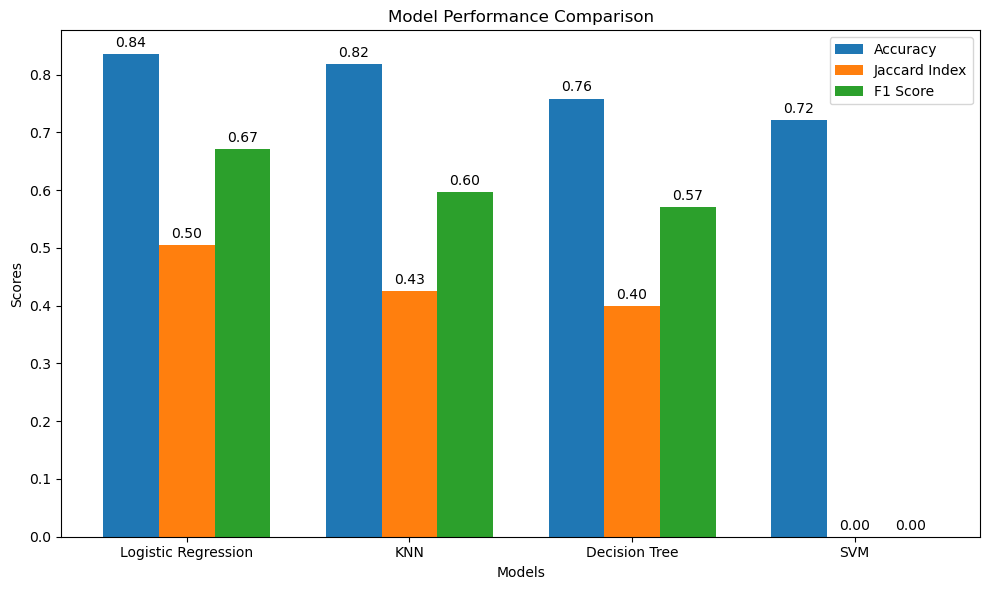

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Przygotowanie danych
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
accuracy = [LR_Accuracy_Score, KNN_Accuracy_Score, Tree_Accuracy_Score, SVM_Accuracy_Score]
jaccard_index = [LR_JaccardIndex, KNN_JaccardIndex, Tree_JaccardIndex, SVM_JaccardIndex]
f1_score = [LR_F1_Score, KNN_F1_Score, Tree_F1_Score, SVM_F1_Score]

# Ustawienia wykresu
x = np.arange(len(models))  # lokalizacje na osi x
width = 0.25  # szerokość słupków

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 6))

# Dodawanie słupków do wykresu
bars1 = ax.bar(x - width, accuracy, width, label='Accuracy')
bars2 = ax.bar(x, jaccard_index, width, label='Jaccard Index')
bars3 = ax.bar(x + width, f1_score, width, label='F1 Score')

# Dodawanie etykiet i tytułu
ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Dodawanie wartości na słupkach
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', 
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)
add_value_labels(bars3)

# Wyświetlenie wykresu
plt.tight_layout()
plt.show()


### Best Model: Logistic Regression


## Logistic Regression consistently outperforms other models across all available metrics, including Accuracy, Jaccard Index, F1 Score, and Log Loss.
Its lower Log Loss demonstrates a high level of confidence in its predictions, making it reliable for probabilistic outcomes.
The balance between precision and recall (F1 Score) suggests it minimizes both false positives and false negatives effectively.

 How to submit

Once you complete your notebook you will have to share it. You can download the notebook by navigating to "File" and clicking on "Download" button.

This will save the (.ipynb) file on your computer. Once saved, you can upload this file in the "My Submission" tab, of the "Peer-graded Assignment" section. 

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

### Other Contributors

[Svitlana Kramar](https://www.linkedin.com/in/svitlana-kramar/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0232ENSkillsNetwork30654641-2022-01-01)

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<!--
## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description          |
| ----------------- | ------- | ------------- | --------------------------- |
| 2022-06-22        | 2.0     | Svitlana K.   | Deleted GridSearch and Mock |
--!>